### Debugging outputs

1.   
(b) It is a stochastic method so your answer may vary. It takes ~1700 steps to converge and took ~0.1 sec

2. 
(b) takes ~250 steps to converge and took ~0.02 sec



$𝑓(𝑥,𝑦)=(1−𝑥)^2 +10(𝑦−𝑥^2)^2$ with only one (global) minimum at (𝑥, 𝑦) = (1.0,1.0)!

### Helper functions

A timing decorator. Put at the beginning of your function so that every time your function is called it'll print out the execution time

In [1]:
# normalize the noise and then multiply it by norm of gradient
import numpy as np
from scipy.optimize import minimize
from random import *

In [2]:
initial_pt = np.array([-0.5,1.5])
display(initial_pt[0], initial_pt[1])

-0.5

1.5

In [3]:
def rosen_bro(pt):
    return (1 - pt[0])**2 + 10*(pt[1] - pt[0]**2)**2
def df_dx(pt):
    return (-2 + (2*pt[0]) - (40 * pt[1] * pt[0]) + (40 * pt[0]**3))
def df_dy(pt):
    return ((20 * pt[1]) - (20 * pt[0]**2))
display('df_dx: ' + str(df_dx(initial_pt)))
display('df_dy: ' + str(df_dy(initial_pt)))

'df_dx: 22.0'

'df_dy: 25.0'

In [4]:
def df_dxy(pt):
    return np.array([(-2 + (2*pt[0]) - (40 * pt[1] * pt[0]) + (40 * pt[0]**3)),
                    (20 * pt[1]) - (20 * pt[0]**2)])
df_dxy(initial_pt)

array([22., 25.])

In [5]:
import time

def timeit(f):

    def timed(*args, **kw):

        ts = time.time()
        result = f(*args, **kw)
        te = time.time()

        print('func:%r took: %2.4f sec' % (f.__name__,  te-ts))
        return result

    return timed

A function that help to visualize the optimization pathway:

In [6]:
%matplotlib notebook
def draw_path(func,path,x_min=-2,x_max=2,y_min=-2,y_max=2):
    a=np.linspace(x_min,x_max,100)
    b=np.linspace(y_min,y_max,100)
    x,y=np.meshgrid(a,b)
    z=func((x,y))
    fig,ax=plt.subplots()
    my_contour=ax.contour(x,y,z,50)
    plt.colorbar(my_contour)
    ax.plot(path[:,0],path[:,1])

### Templates for algorithm you need to implement

In [7]:
from pylab import *
import numpy.linalg as LA

In [8]:
def rand_2(grad_stp):
    rand_vec = np.array([((random() * 2) - 1), ((random() * 2) - 1)])
    nrml_rand = rand_vec / LA.norm(rand_vec)
    fin_rand = nrml_rand * LA.norm(grad_stp)
    return fin_rand
rand_2(initial_pt)

array([ 1.27925769, -0.92924688])

In [9]:
@timeit
def stochastic_gradient_descent(func, first_derivate, starting_point,
                                stepsize, tol=1e-5,
                                stochastic_injection=1):
    '''
    first_derivate: a function that calculates gradient
    stochastic_injection: controls the magnitude of stochasticity (multiplied with stochastic_deriv)
    0 for no stochasticity, equivalent to SD. 
    Use 1 in this homework to run SGD
    '''
    # evaluate the gradient at starting point
    deriv = first_derivate(starting_point)
    count=0
    visited=[]
    while LA.norm(deriv) > tol and count < 1e5: 
        visited.append(starting_point)
        deriv = first_derivate(starting_point)
        if stochastic_injection>0:
            # formulate a stochastic_deriv that is the same norm as your gradient 
            stochastic_deriv = rand_2(deriv)
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction=-(deriv+stochastic_injection*stochastic_deriv)
        # calculate new point position
        new_point = starting_point + (stepsize * direction)
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = stepsize * 1.2
            starting_point = new_point
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            stepsize = stepsize * 0.5
        count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited), 
           "count": count}

## 1a:

In [10]:
res_gd = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1, 1e-5, 0)
print(res_gd)

func:'stochastic_gradient_descent' took: 0.0333 sec
{'x': array([0.99999105, 0.99998163]), 'evaluation': 8.230174325499452e-11, 'path': array([[-0.5       ,  1.5       ],
       [-0.5       ,  1.5       ],
       [-0.5       ,  1.5       ],
       ...,
       [ 0.99999068,  0.99998135],
       [ 0.99999093,  0.99998135],
       [ 0.99999089,  0.99998153]]), 'count': 1524}


In [11]:
len(res_gd['path'])

1524

Both count and the number of points in the path array affirm that it takes 1524 steps for steepest descent to converge to the minimum

<IPython.core.display.Javascript object>


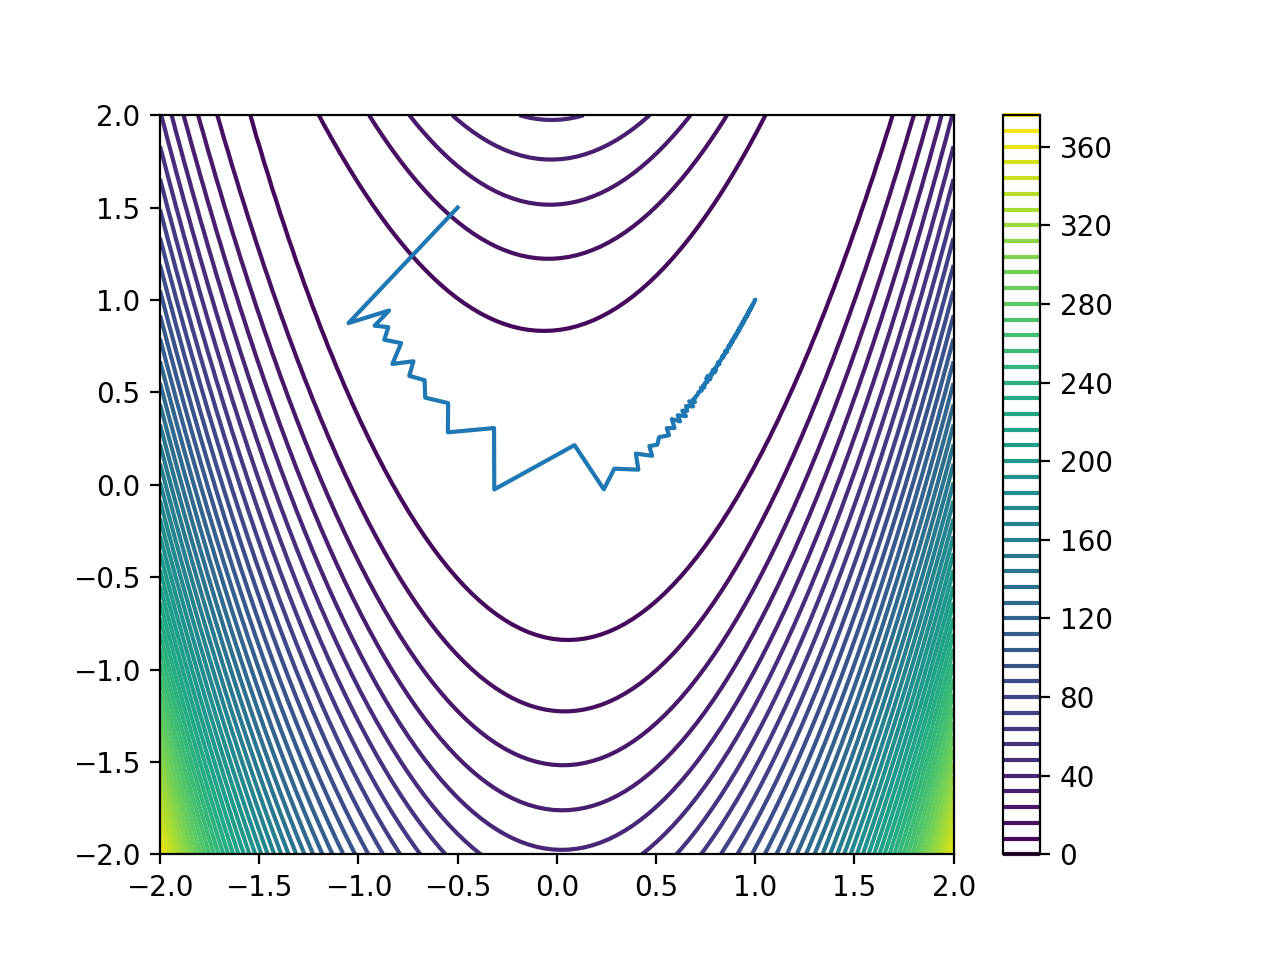

In [12]:
draw_path(rosen_bro, res_gd['path'])

## 1b:

In [13]:
res_sgd = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1, 1e-5, 1)
print(res_sgd)

func:'stochastic_gradient_descent' took: 0.0736 sec
{'x': array([0.99998904, 0.99997732]), 'evaluation': 1.2586738122179724e-10, 'path': array([[-0.5       ,  1.5       ],
       [-0.5       ,  1.5       ],
       [-0.5       ,  1.5       ],
       ...,
       [ 0.9999888 ,  0.99997702],
       [ 0.99998873,  0.99997704],
       [ 0.99998885,  0.99997724]]), 'count': 2276}


In [14]:
len(res_sgd['path'])

2276

With the random derivatives, I am taking at least 1900 steps and computation time is usually around 0.07 to 0.10 seconds.

<IPython.core.display.Javascript object>


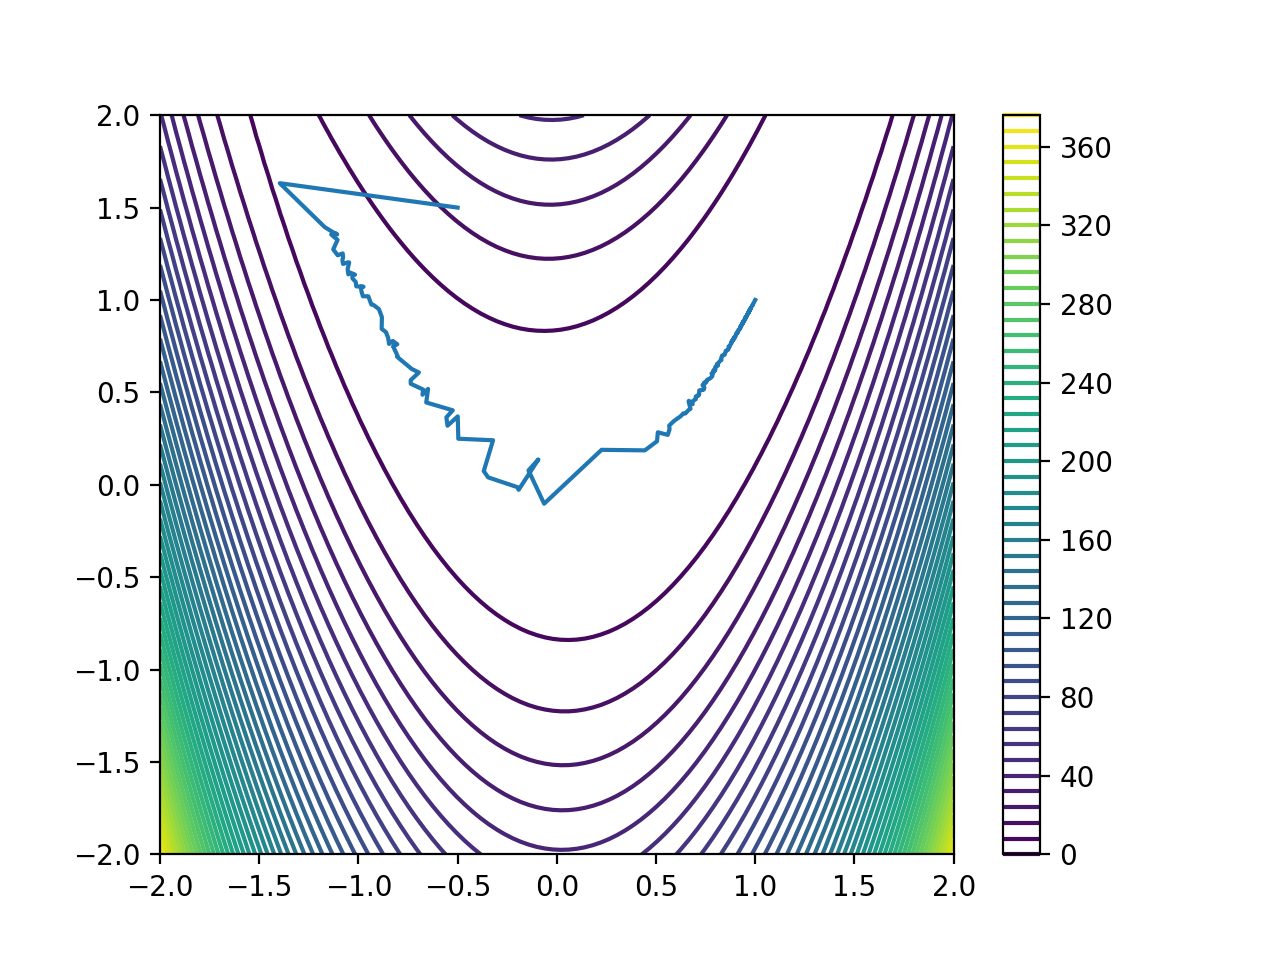

In [15]:
draw_path(rosen_bro, res_sgd['path'])

## 1c:

In [16]:
# BFGS
min_res = minimize(rosen_bro, initial_pt, method='BFGS', tol= 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

      fun: 1.6856836004019217e-13
 hess_inv: array([[0.50988602, 1.01962714],
       [1.01962714, 2.08896666]])
      jac: array([ 1.15312325e-07, -1.29424893e-08])
  message: 'Optimization terminated successfully.'
     nfev: 93
      nit: 22
     njev: 31
   status: 0
  success: True
        x: array([0.99999959, 0.99999917])

'the minimum is [0.99999959 0.99999917]'

In [17]:
# CG
min_res = minimize(rosen_bro, initial_pt, method='CG', tol = 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

     fun: 2.0711814827200667e-13
     jac: array([ 4.94555024e-08, -2.45172016e-08])
 message: 'Optimization terminated successfully.'
    nfev: 132
     nit: 20
    njev: 44
  status: 0
 success: True
       x: array([0.99999955, 0.99999908])

'the minimum is [0.99999955 0.99999908]'

Based on the number of iterations or steps, Stochastic Gradient Descent performed the worst with at least 2000 steps, BFGS came in second place with 22 steps, and CG came in first with 20 steps. When minimizing this function, Stochastic Gradient Descent is by far the worst since the algorithm took the most steps, BFGS barely lost by 2 steps but ended up with a great 22 steps, and CG is most efficient with 20 steps. 

## 1d:

I cannot firmly draw a conclusion based on one run of each of the methods. Stochastic Gradient Descent has random derivatives or directions provided to it that may or may not improve this algorithm's performance. However, it is hard to see this algorithm surpass CG or BFGS due to the massive number of steps this algorithm took compared to CG or BFGS. Lastly, for CG and BFGS, the initial point's gradients or Hessian approximation may have been more or less for favorable for CG or BFGS respectively. Thus, along with the fact that there is such a small difference in number of iterations between these algorithms' performances, it is best to evaluate CG and BFGS after looking at their performances across multiple different initial points. 

## 1e:

In [18]:
# SGD
initial_pt = np.array([0, -0.5])
res_sgd = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1, 1e-5, 1)
print(res_sgd)

func:'stochastic_gradient_descent' took: 0.0743 sec
{'x': array([0.99998918, 0.99997782]), 'evaluation': 1.2003005721382016e-10, 'path': array([[ 0.        , -0.5       ],
       [ 0.        , -0.5       ],
       [-0.21468784,  0.40121261],
       ...,
       [ 0.99998894,  0.99997753],
       [ 0.99998907,  0.99997764],
       [ 0.99998906,  0.99997764]]), 'count': 2270}


In [19]:
res_sgd = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1, 1e-5, 0)
print(res_sgd)

func:'stochastic_gradient_descent' took: 0.0325 sec
{'x': array([0.99999178, 0.99998314]), 'evaluation': 6.934099069260897e-11, 'path': array([[ 0.        , -0.5       ],
       [ 0.2       ,  0.5       ],
       [ 0.2       ,  0.5       ],
       ...,
       [ 0.99999177,  0.99998289],
       [ 0.99999177,  0.99998289],
       [ 0.99999163,  0.99998307]]), 'count': 1523}


In [20]:
# BFGS
min_res = minimize(rosen_bro, initial_pt, method='BFGS', tol= 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

      fun: 4.0505854790199957e-13
 hess_inv: array([[0.4902549 , 0.97825568],
       [0.97825568, 2.00182255]])
      jac: array([ 1.42220817e-07, -2.49934076e-07])
  message: 'Optimization terminated successfully.'
     nfev: 48
      nit: 11
     njev: 16
   status: 0
  success: True
        x: array([0.99999937, 0.99999871])

'the minimum is [0.99999937 0.99999871]'

In [21]:
#CG
min_res = minimize(rosen_bro, initial_pt, method='CG', tol = 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

     fun: 2.1215333967541437e-13
     jac: array([-1.00622151e-06,  5.00357342e-07])
 message: 'Optimization terminated successfully.'
    nfev: 99
     nit: 15
    njev: 33
  status: 0
 success: True
       x: array([0.99999954, 0.9999991 ])

'the minimum is [0.99999954 0.9999991 ]'

In [22]:
# SGD
initial_pt = np.array([-1, -.5])
res_sgd = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1, 1e-5, 1)
print(res_sgd)

func:'stochastic_gradient_descent' took: 0.0711 sec
{'x': array([0.99998899, 0.99997764]), 'evaluation': 1.2238417117140088e-10, 'path': array([[-1.        , -0.5       ],
       [-1.        , -0.5       ],
       [-1.        , -0.5       ],
       ...,
       [ 0.99998896,  0.99997742],
       [ 0.99998896,  0.99997742],
       [ 0.99998898,  0.99997753]]), 'count': 2214}


In [23]:
res_sgd = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1, 1e-5, 0)
print(res_sgd)

func:'stochastic_gradient_descent' took: 0.0313 sec
{'x': array([0.99998997, 0.9999796 ]), 'evaluation': 1.0173683254251602e-10, 'path': array([[-1.        , -0.5       ],
       [-1.        , -0.5       ],
       [-1.        , -0.5       ],
       ...,
       [ 0.99999005,  0.99997912],
       [ 0.99998981,  0.99997935],
       [ 0.99998995,  0.99997943]]), 'count': 1480}


In [24]:
# BFGS
min_res = minimize(rosen_bro, initial_pt, method='BFGS', tol= 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

      fun: 2.09834861570021e-13
 hess_inv: array([[0.49933033, 0.99891362],
       [0.99891362, 2.04819417]])
      jac: array([-3.44827812e-08,  1.41457290e-08])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 16
     njev: 20
   status: 0
  success: True
        x: array([0.99999954, 0.99999908])

'the minimum is [0.99999954 0.99999908]'

In [25]:
#CG
min_res = minimize(rosen_bro, initial_pt, method='CG', tol = 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

     fun: 1.143636894107229e-13
     jac: array([1.56435011e-07, 7.02907883e-07])
 message: 'Optimization terminated successfully.'
    nfev: 90
     nit: 13
    njev: 30
  status: 0
 success: True
       x: array([1.00000033, 1.00000068])

'the minimum is [1.00000033 1.00000068]'

In [26]:
# SGD
initial_pt = np.array([1, -.5])
res_sgd = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1, 1e-5, 1)
print(res_sgd)

func:'stochastic_gradient_descent' took: 0.0706 sec
{'x': array([1.00000982, 1.00001994]), 'evaluation': 9.737309488319108e-11, 'path': array([[ 1.        , -0.5       ],
       [ 1.        , -0.5       ],
       [ 1.        , -0.5       ],
       ...,
       [ 1.0000097 ,  1.00002016],
       [ 1.0000097 ,  1.00002016],
       [ 1.00000985,  1.00002004]]), 'count': 2137}


In [27]:
res_sgd = stochastic_gradient_descent(rosen_bro, df_dxy, initial_pt, 0.1, 1e-5, 0)
print(res_sgd)

func:'stochastic_gradient_descent' took: 0.0315 sec
{'x': array([0.99999168, 0.99998292]), 'evaluation': 7.11370341935455e-11, 'path': array([[ 1.        , -0.5       ],
       [ 1.        , -0.5       ],
       [ 1.        , -0.5       ],
       ...,
       [ 0.99999167,  0.99998267],
       [ 0.99999167,  0.99998267],
       [ 0.99999153,  0.99998286]]), 'count': 1523}


In [28]:
# BFGS
min_res = minimize(rosen_bro, initial_pt, method='BFGS', tol= 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

      fun: 2.376706415488638e-13
 hess_inv: array([[0.50161626, 1.0021435 ],
       [1.0021435 , 2.05248923]])
      jac: array([-2.77600619e-07,  1.05818496e-07])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 14
     njev: 18
   status: 0
  success: True
        x: array([0.99999951, 0.99999902])

'the minimum is [0.99999951 0.99999902]'

In [29]:
#CG
min_res = minimize(rosen_bro, initial_pt, method='CG', tol = 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

     fun: 2.952266887838151e-13
     jac: array([ 2.72944689e-06, -1.39560554e-06])
 message: 'Optimization terminated successfully.'
    nfev: 78
     nit: 13
    njev: 26
  status: 0
 success: True
       x: array([0.99999951, 0.99999895])

'the minimum is [0.99999951 0.99999895]'

I tested 3 new points: (1, -0.5), (0, -0.5), and (-1, -0.5). As expected, the most efficient optimization algorithm fluctuated,depending on the initial point,between CG and BFGS , but CG was most frequently the most efficient across all 4 (including the original) tested point. With the Rosenbrock banana function only having one minimum, the stochastic methods like stochastic gradient descent appear to consistently take more steps or iterations compared to non-stochastic optimization methods like steepest descent. This is because the non-stochastic methods are following the same trajectory to the minimum every time, but the stochastic methods due to their inherent randomness are using different paths every time. For this Rosenbrock Banana function, non-stochastic methods are superior because you can take the same path and are guaranteed to find the global minimum since there is only one minimum for this function. However, for functions with multiple minima, I expect the stochastic methods to be superior since their randomness gives them a greater chance to escape local minima and discover the global minimum. I explicitly state greater chance since stochastic methods can also get trapped in local minima. 

$𝑓(𝑥, 𝑦) = 2𝑥^2 − 1.05𝑥^4 + 𝑥^6⁄6 + 𝑥𝑦 + 𝑦^2$

## 2a

In [30]:
initial_pt = np.array([-1.5, -1.5])
def ban_func(ipt):
    return ((2 * ipt[0]**2) - (1.05 * ipt[0]**4) + ((1/6) * ipt[0]** 6) + (ipt[0]*ipt[1]) + (ipt[1]**2))
def ban_dxy(ipt):
    dx = ((4 *ipt[0]) -(4.2 * ipt[0]**3) + (ipt[0]**5) + ipt[1])
    dy = (ipt[0] + (2 * ipt[1]))
    return np.array([dx, dy])
ban_func(initial_pt)
ban_dxy(initial_pt)

array([-0.91875, -4.5    ])

In [31]:
res_SGD = stochastic_gradient_descent(ban_func, ban_dxy, initial_pt, 0.1,1)
print(res_SGD)

func:'stochastic_gradient_descent' took: 0.0005 sec
{'x': array([-1.78118234,  0.62451362]), 'evaluation': 0.3764313488161361, 'path': array([[-1.5       , -1.5       ],
       [-1.11218645, -0.6987716 ],
       [-1.22473133, -0.17601378],
       [-1.39542104,  0.18055216],
       [-1.36314265,  0.51050887],
       [-1.78118234,  0.62451362]]), 'count': 6}


<IPython.core.display.Javascript object>


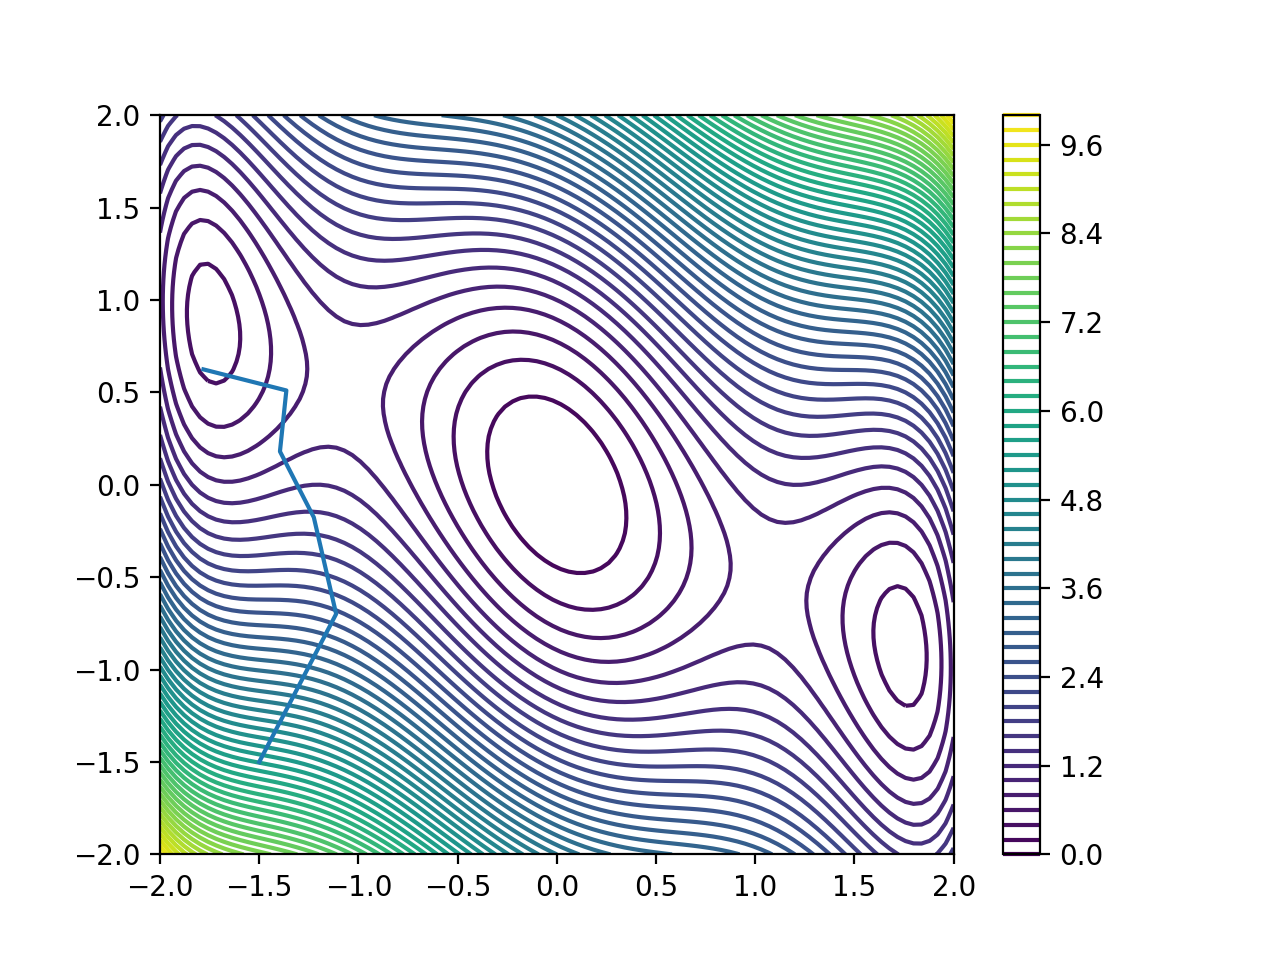

In [32]:
draw_path(ban_func, res_SGD['path'])

In [33]:
# BFGS
min_res = minimize(ban_func, initial_pt, method='BFGS', tol= 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

      fun: 0.29863844223686
 hess_inv: array([[ 0.08568879, -0.04290027],
       [-0.04290027,  0.51091277]])
      jac: array([1.34110451e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 8
     njev: 10
   status: 0
  success: True
        x: array([-1.74755234,  0.87377616])

'the minimum is [-1.74755234  0.87377616]'

In [34]:
#CG
min_res = minimize(ban_func, initial_pt, method='CG', tol = 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

     fun: 0.2986384422397135
     jac: array([8.44895840e-06, 7.15255737e-07])
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 7
    njev: 21
  status: 0
 success: True
       x: array([-1.74755166,  0.87377618])

'the minimum is [-1.74755166  0.87377618]'

With SGD, I do not recall encountering the global minimum of (0,0) across 10 attempts, but I have gotten close to it with the closest being where the outputted minimum was (-0.009, -0.0033) and a function evaluation of 0.00017. During this specific attempt, it took 6 steps, but other close attempts took around 7 to 8 steps. BFGS and CG consistently found the local minima: (-1.748, 0.8738) in 7 to 8 iterations across 10 different trials, so clearly its set path is not allowing it to encounter a global minimum.

## 2b:

In [35]:
@timeit
def SGDM(func,first_derivate,starting_point,stepsize,momentum=0.9,tol=1e-5,stochastic_injection=1):
    # evaluate the gradient at starting point
    deriv = first_derivate(starting_point)
    count=0
    visited=[]
    prev_direction = 0
    while LA.norm(deriv) > tol and count < 1e5:
        visited.append(starting_point)
        deriv = first_derivate(starting_point)
        if (stochastic_injection>0):
            # formulate a stochastic_deriv that is the same norm as your gradient 
            stochastic_deriv = rand_2(deriv)
        else:
            stochastic_deriv=np.zeros(len(starting_point))
        direction= -(deriv+stochastic_injection*stochastic_deriv) + (momentum * prev_direction)
        # calculate new point position
        new_point = starting_point + (stepsize * direction)
        if func(new_point) < func(starting_point):
            # the step makes function evaluation lower - it is a good step. what do you do?
            stepsize = 1.2 * stepsize
            starting_point = new_point
        else:
            # the step makes function evaluation higher - it is a bad step. what do you do?
            # if stepsize is too small, clear previous direction because we already know that is not a useful direction
            if stepsize<1e-5:
                prev_direction = prev_direction - prev_direction
            else:
                # do the same as SGD here
                prev_direction = direction
                stepsize = 0.5 * stepsize
        count+=1
    return {"x":starting_point,"evaluation":func(starting_point),"path":np.asarray(visited),
           "count" : count}

In [36]:
res_SGDM = SGDM(ban_func, ban_dxy, initial_pt, 0.1,0.9)
print(res_SGDM)

func:'SGDM' took: 0.0144 sec
{'x': array([-1.74755156,  0.87377583]), 'evaluation': 0.29863844224049996, 'path': array([[-1.5       , -1.5       ],
       [-1.77066783, -0.76803598],
       [-1.49254173, -0.82903315],
       [-1.05098611, -0.57921398],
       [-1.02999734, -0.58979236],
       [-1.26040978, -0.31752085],
       [-1.27514246, -0.31627598],
       [-1.1368798 ,  0.81190171],
       [-1.48759285,  0.84317896],
       [-1.48193475,  0.77486691],
       [-1.48193475,  0.77486691],
       [-1.48193475,  0.77486691],
       [-1.48193475,  0.77486691],
       [-1.80181659,  0.48265546],
       [-1.80181659,  0.48265546],
       [-1.80181659,  0.48265546],
       [-1.78511393,  0.49763658],
       [-1.77232643,  0.501133  ],
       [-1.77232643,  0.501133  ],
       [-1.77232643,  0.501133  ],
       [-1.7722473 ,  0.51211441],
       [-1.78159919,  0.53480404],
       [-1.78184892,  0.54575248],
       [-1.78184892,  0.54575248],
       [-1.79246542,  0.56068035],
       [-1.8

<IPython.core.display.Javascript object>


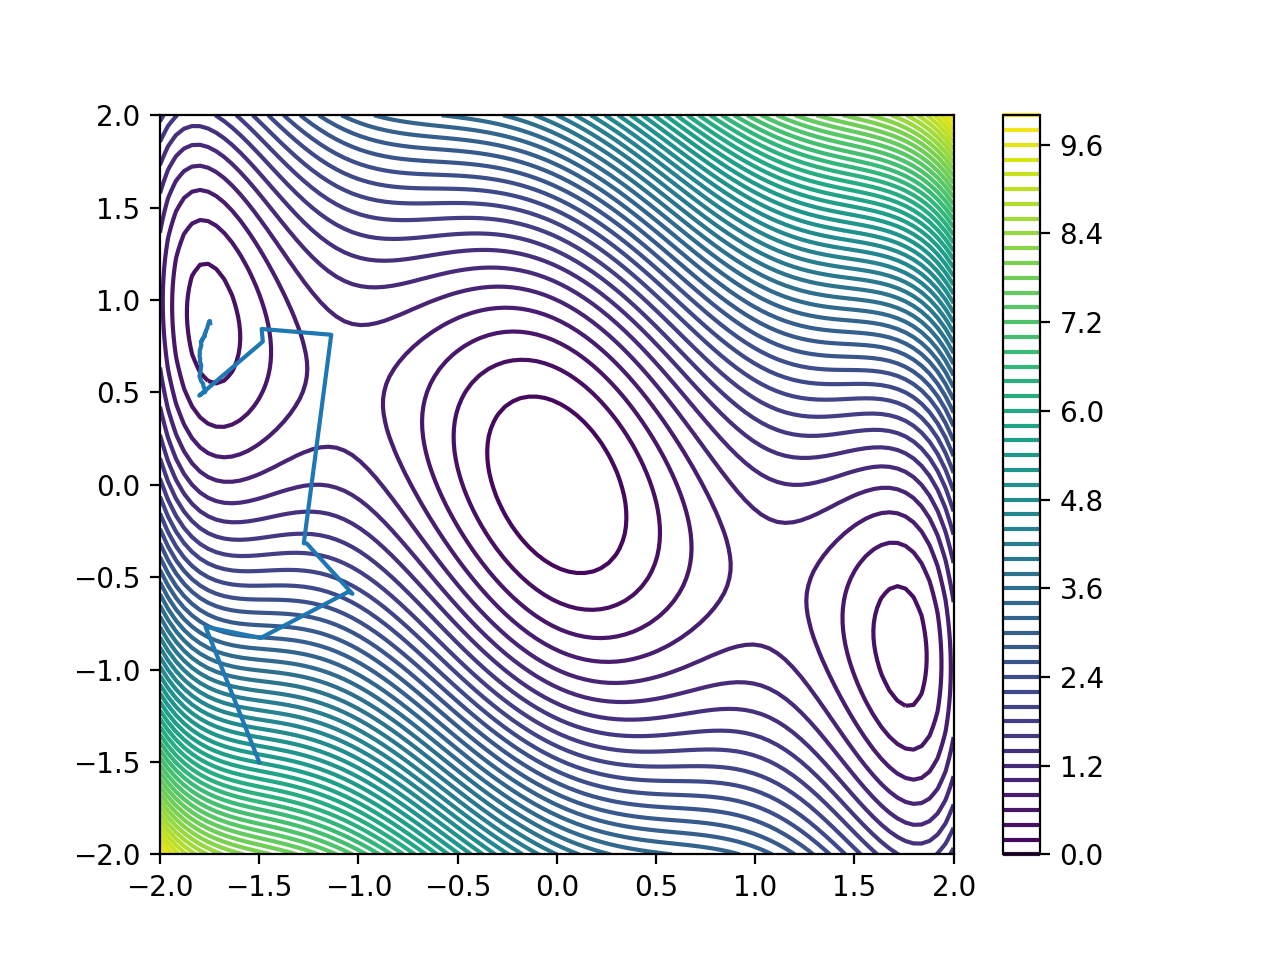

In [37]:
draw_path(ban_func, res_SGDM['path'])

In [38]:
res_SGD = stochastic_gradient_descent(ban_func, ban_dxy, initial_pt, 0.1,1)
print(res_SGD)

func:'stochastic_gradient_descent' took: 0.0013 sec
{'x': array([-1.73418836,  0.885903  ]), 'evaluation': 0.30000808026296966, 'path': array([[-1.5       , -1.5       ],
       [-1.72398402, -1.3834278 ],
       [-1.95741091, -0.49159391],
       [-1.90567999,  0.44119066],
       [-1.9239646 ,  0.72004121],
       [-1.9239646 ,  0.72004121],
       [-1.76638349,  0.47079031],
       [-1.76638349,  0.47079031],
       [-1.78994773,  0.50824878],
       [-1.81065883,  0.56513818],
       [-1.60191976,  0.69880785],
       [-1.6202945 ,  0.78499384],
       [-1.63687759,  0.72780875]]), 'count': 13}


<IPython.core.display.Javascript object>


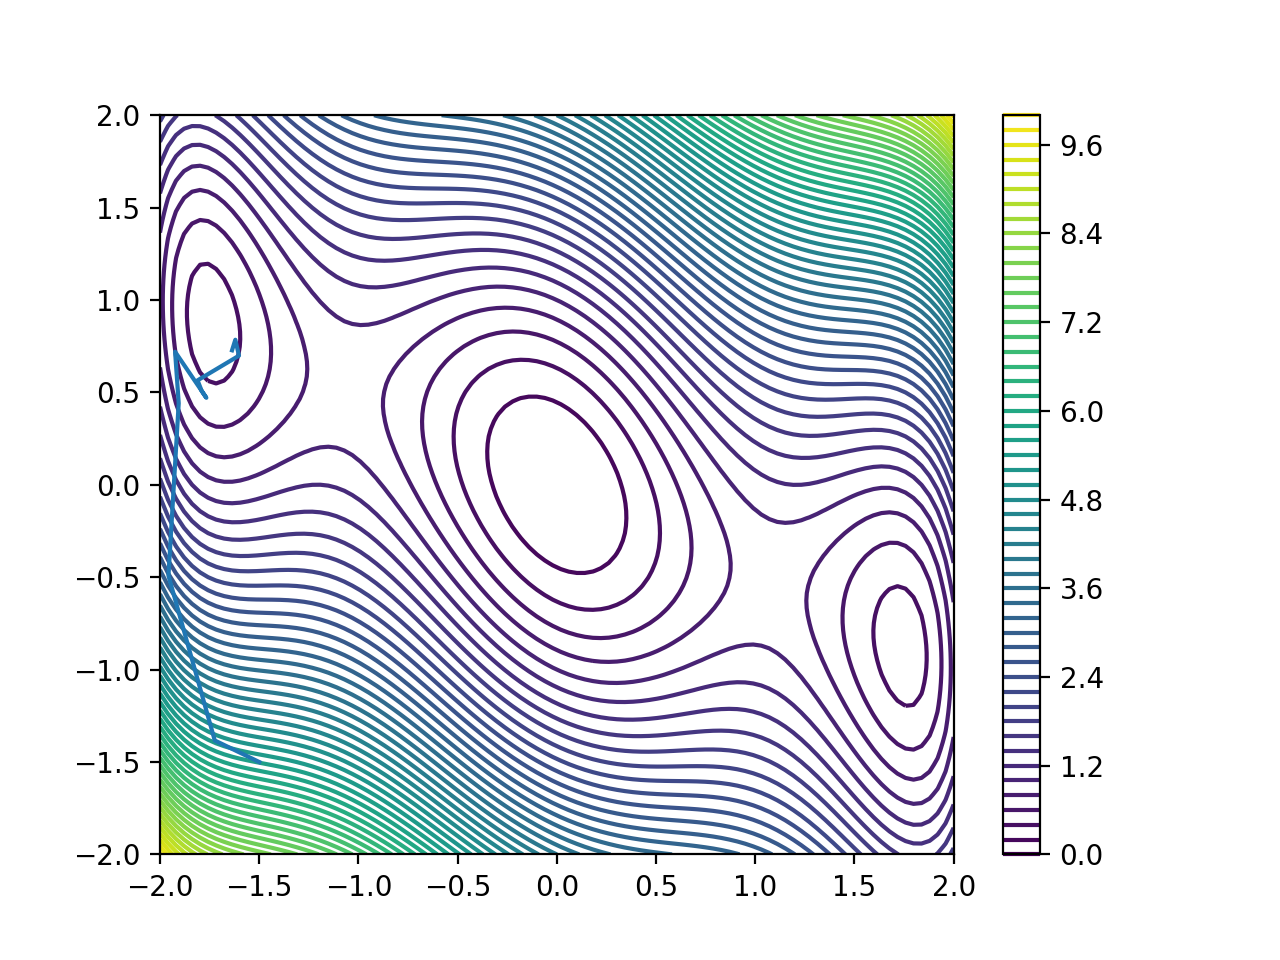

In [39]:
draw_path(ban_func, res_SGD['path'])

From using the initial point: (-1.5, -1.5), SGD, CG, and BFGS failed to arrive at a minimum smaller than the minimum derived via SGDM. CG and BFGS can only reach the local minimum of (-1.748, 0.8738). SGD can avoid the local minimum of (-1.748, 0.8738) at times, but its smallest function evaluation across 10 trials has still been 0.00017. However, it does reach this value in fewer steps (around 6 to 10 steps). SGDM did get the closest to the global minimum with its closest minimum at (-1.67e-6, 2.71e-6) and function evaluation of 8.4e-12. SGDM does take a lot more steps of at least 190 steps with max of around 450 steps and a time of around 0.015 to 0.03 seconds. These values were taken across 10 trials. 

In [40]:
initial_pt = np.array([-1.5, -1])
res_SGDM = SGDM(ban_func, ban_dxy, initial_pt, 0.1,0.9)
print(res_SGDM)

func:'SGDM' took: 0.0169 sec
{'x': array([1.86323011e-07, 3.94944669e-06]), 'evaluation': 1.6403434483694995e-11, 'path': array([[-1.50000000e+00, -1.00000000e+00],
       [-1.11909275e+00, -5.53508312e-01],
       [-1.19976642e+00, -5.04207778e-01],
       [-7.99490127e-01, -1.34683834e-01],
       [-7.91897004e-01,  2.45018106e-01],
       [-4.62273653e-01,  5.36165338e-01],
       [-4.87842941e-01,  2.80951649e-01],
       [ 1.94794659e-01,  9.16647520e-02],
       [ 1.28811504e-01, -2.75615586e-01],
       [ 1.28811504e-01, -2.75615586e-01],
       [ 1.28811504e-01, -2.75615586e-01],
       [ 1.04011430e-01, -1.99524261e-01],
       [ 1.25900716e-01, -4.04316777e-02],
       [ 1.25900716e-01, -4.04316777e-02],
       [ 7.24548044e-02, -2.24489512e-02],
       [ 6.34530452e-02,  1.51444392e-02],
       [ 6.34530452e-02,  1.51444392e-02],
       [ 4.51587236e-02,  1.52335094e-02],
       [ 3.93425992e-02, -1.41935515e-02],
       [ 2.56453922e-02, -3.66731468e-02],
       [ 2.5645392

In [41]:
res_SGD = stochastic_gradient_descent(ban_func, ban_dxy, initial_pt, 0.1,1)
print(res_SGD)

func:'stochastic_gradient_descent' took: 0.0004 sec
{'x': array([-0.0460764 ,  0.04705511]), 'evaluation': 0.004287391138893303, 'path': array([[-1.5       , -1.        ],
       [-1.1257925 , -0.76751009],
       [-0.67258628, -0.32690267],
       [-0.36122163,  0.19250171],
       [-0.01717093,  0.2764426 ]]), 'count': 5}


In [42]:
# BFGS
min_res = minimize(ban_func, initial_pt, method='BFGS', tol= 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

      fun: 0.29863844223697433
 hess_inv: array([[ 0.08553288, -0.04207972],
       [-0.04207972,  0.50927369]])
      jac: array([ 6.10947609e-07, -5.43892384e-07])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 8
     njev: 11
   status: 0
  success: True
        x: array([-1.74755227,  0.87377585])

'the minimum is [-1.74755227  0.87377585]'

In [43]:
#CG
min_res = minimize(ban_func, initial_pt, method='CG', tol = 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

     fun: 0.2986384422554522
     jac: array([-5.81145287e-07,  8.39680433e-06])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 12
  status: 0
 success: True
       x: array([-1.74755276,  0.87378057])

'the minimum is [-1.74755276  0.87378057]'

When I set the initial point as (-1.5, -1), CG and BFGS get stuck in local minimum: (-1.748, 0.8738) at 6 and 8 iterations respectively. However, SGD can escape this local minimum at times, but does not get as close to the global minimum of (0,0) as SGDM does on average. The closest SGD has reached to the global minimum is when it arrived at a minimum of (0.0013, 0.017) and a function evaluation of 0.000333. It took around 6 to 12 steps in 10 trials where it reached a similar function evalution, but it arrives at at a function evaluation within this range maybe 30% of the time you run it. SGDM arrives at function evalutions in the 1e-11 to 9e-12 range in at least 200 to 400 iterations and time range of 0.015 to 0.026 seconds. SGDM arrives at minima with function evaluations within this range much more frequently than SGD and is the closest to the global minimum by far. 

In [44]:
initial_pt = np.array([-0.5, -1])
res_SGDM = SGDM(ban_func, ban_dxy, initial_pt, 0.1,0.9)
print(res_SGDM)

func:'SGDM' took: 0.0183 sec
{'x': array([ 3.06302862e-06, -4.18959338e-06]), 'evaluation': 2.34841368838702e-11, 'path': array([[-5.00000000e-01, -1.00000000e+00],
       [-3.74311718e-01, -4.18784500e-01],
       [-3.75608147e-01, -4.16945158e-01],
       [-3.96628901e-01, -1.02867375e-01],
       [-3.29293398e-01, -1.98138360e-01],
       [-2.96046254e-01,  1.53338739e-01],
       [ 1.13824952e-01,  7.45235982e-03],
       [ 1.13824952e-01,  7.45235982e-03],
       [ 1.13824952e-01,  7.45235982e-03],
       [-1.02960391e-02, -8.44045184e-02],
       [-1.02960391e-02, -8.44045184e-02],
       [-1.02960391e-02, -8.44045184e-02],
       [-1.02960391e-02, -8.44045184e-02],
       [-1.02960391e-02, -8.44045184e-02],
       [-1.34333753e-02, -8.17890255e-02],
       [-1.48630427e-02, -7.97267539e-02],
       [-1.79949711e-02, -7.40281035e-02],
       [-1.79949711e-02, -7.40281035e-02],
       [-1.92584876e-02, -7.12110749e-02],
       [-2.01447125e-02, -7.01671354e-02],
       [-2.0828847

In [45]:
res_SGD = stochastic_gradient_descent(ban_func, ban_dxy, initial_pt, 0.1,1)
print(res_SGD)

func:'stochastic_gradient_descent' took: 0.0003 sec
{'x': array([ 0.01111212, -0.15660334]), 'evaluation': 0.023031352802441788, 'path': array([[-0.5       , -1.        ],
       [ 0.09812358, -0.81751023],
       [-0.03578129, -0.68100963],
       [ 0.12291764, -0.24953483]]), 'count': 4}


In [46]:
# BFGS
min_res = minimize(ban_func, initial_pt, method='BFGS', tol= 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

      fun: 1.3179953981832163e-12
 hess_inv: array([[ 0.28589117, -0.14067583],
       [-0.14067583,  0.5983458 ]])
      jac: array([1.46375181e-06, 2.30040476e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([8.31993400e-08, 1.10115213e-06])

'the minimum is [8.31993400e-08 1.10115213e-06]'

In [47]:
#CG
min_res = minimize(ban_func, initial_pt, method='CG', tol = 1e-5)
display(min_res)
funcxy_min_val = min_res['x']
display('the minimum is ' + str(funcxy_min_val))

     fun: 3.956950053514989e-19
     jac: array([3.15810487e-08, 1.53186291e-08])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 5
    njev: 10
  status: 0
 success: True
       x: array([ 4.48569251e-10, -1.55506956e-11])

'the minimum is [ 4.48569251e-10 -1.55506956e-11]'

With initial point of (-0.5, -1), CG and BFGS get their closest attempts to the global minimum so far at 5 and 6 iterations respectively. With this new point, SGD does not hit function evaluations within the range of the smallest function evalutions of either CG, BFGS, and SGDM. In attempts succesfully getting extremely close to the global minimum, SGDM takes a lot more steps than CG and BFGS of around 200 to 400 steps, but its time is still within 0.015 to 0.026 seconds. With this point of (-0.5, -1), CG and BFGS performed better than SGDM for the first time out of all 3 tested initial points and in much fewer iterations (5 and 6 compared to 200 to 400 for SGDM). 